In [32]:
#libraries
import pandas as pd
import sys 
import numpy as np # linear algebra
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt # this is used for the plot the graph 
import pickle

In [9]:
##original datasets 
testx=pd.read_csv("data files/testx.csv",index_col=0);
testy=pd.read_csv("data files/testy.csv",index_col=0);
trainx=pd.read_csv("data files/trainx.csv",index_col=0);
trainy=pd.read_csv("data files/trainy.csv",index_col=0);

In [10]:
testx.head()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,11.066667,11.066667,0.86,21.8638,0.0,9.9820,1009.22
1,7.444444,7.444444,0.97,2.7370,153.0,0.2737,1020.57
2,1.533333,-1.727778,0.90,11.1090,323.0,13.8138,1016.92
3,12.844444,12.844444,0.72,19.9318,170.0,7.0840,1024.79
4,5.472222,4.433333,0.97,5.5545,264.0,3.1234,1014.82


In [11]:
trainx.head()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,14.727778,14.727778,0.56,12.4936,151.0,16.1000,1009.03
1,6.333333,4.577778,0.85,8.5813,145.0,11.4471,1006.98
2,5.394444,3.055556,0.90,10.4006,296.0,15.1823,1004.15
3,15.000000,15.000000,0.87,5.7960,189.0,15.8746,1017.15
4,0.000000,-2.733333,0.69,8.0500,340.0,9.9820,1029.00


In [12]:
trainy.head()

,summary
0,2
1,3
2,2
3,2
4,4


max accuracy of 0.47333597988619824 at k= 34


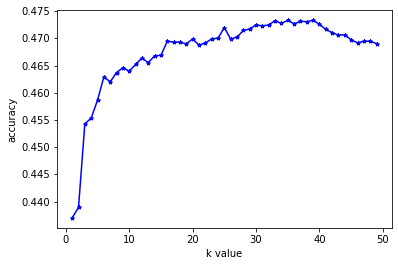

In [14]:
#we want the maximum accuracy for the model, deciding best k value
accuracy=[];#array for all the accuracies for the different k values

for i in range(1,50):#test all k values from 1 to 50
    classifier=KNeighborsClassifier(n_neighbors=i);
    classifier.fit(trainx,trainy.values.ravel()); ##.ravel makes a flattened array for y values
    prediction=classifier.predict(testx);#predict the value
    accuracy.append(metrics.accuracy_score(testy,prediction));#add accuracy to the array
    

#plot k value vs accuracy     
plt.figure();
plt.plot(range(1,50),accuracy,color='blue', linestyle='-', marker='*', markerfacecolor='green',markersize=4);
plt.xlabel('k value');
plt.ylabel('accuracy');
print("max accuracy of", max(accuracy),"at k=",accuracy.index(max(accuracy)));
#best k value has been determined to be at k=34

In [15]:
#lines below this were the first attempt of implementing knn with k=5

classifier=KNeighborsClassifier(n_neighbors=5);
classifier.fit(trainx,trainy.values.ravel());

In [16]:
prediction=classifier.predict(testx)

In [17]:
print (prediction)


[3 5 1 ... 1 1 2]


In [18]:
print(confusion_matrix(testy,prediction))
print(classification_report(testy,prediction))

[[7770 3372  748  677   79]
 [4913 4538 1263  389  104]
 [1741 2215 2302  161  291]
 [2268 1049  296  602  136]
 [ 129  160  428   36 2118]]
              precision    recall  f1-score   support

           1       0.46      0.61      0.53     12646
           2       0.40      0.40      0.40     11207
           3       0.46      0.34      0.39      6710
           4       0.32      0.14      0.19      4351
           5       0.78      0.74      0.76      2871

    accuracy                           0.46     37785
   macro avg       0.48      0.45      0.45     37785
weighted avg       0.45      0.46      0.45     37785



In [19]:
#testy and trainy will be the same as before since normalization/standarization is not done on the y

testx_norm=pd.read_csv("data files/norm_testx.csv",index_col=0);
trainx_norm=pd.read_csv("data files/norm_trainx.csv",index_col=0);


In [20]:
classifier2=KNeighborsClassifier(n_neighbors=5);
classifier2.fit(trainx_norm,trainy.values.ravel());
prediction2=classifier2.predict(testx_norm)

In [21]:
print(classification_report(testy,prediction2))

              precision    recall  f1-score   support

           1       0.50      0.64      0.56     12646
           2       0.45      0.45      0.45     11207
           3       0.56      0.44      0.49      6710
           4       0.41      0.20      0.27      4351
           5       0.91      0.92      0.92      2871

    accuracy                           0.52     37785
   macro avg       0.57      0.53      0.54     37785
weighted avg       0.52      0.52      0.51     37785



In [22]:
testx_std=pd.read_csv("data files/std_testx.csv",index_col=0);
trainx_std=pd.read_csv("data files/std_trainx.csv",index_col=0);


In [23]:
classifier3=KNeighborsClassifier(n_neighbors=5);
classifier3.fit(trainx_std,trainy.values.ravel());
prediction3=classifier3.predict(testx_std)

In [24]:
print(classification_report(testy,prediction3))

              precision    recall  f1-score   support

           1       0.50      0.65      0.57     12646
           2       0.45      0.46      0.46     11207
           3       0.56      0.43      0.49      6710
           4       0.43      0.21      0.28      4351
           5       0.90      0.91      0.91      2871

    accuracy                           0.52     37785
   macro avg       0.57      0.53      0.54     37785
weighted avg       0.52      0.52      0.51     37785



In [67]:
##hyperparameter tuning

leafsize=list(range(1,50));
#neighbors=list(range(1,5));  ##dont need to test neighbors since I determined earlier in for loop before learning about gridsearch
distancetype=[1,2,3];

hyperparameters=dict(leaf_size=leafsize, p=distancetype); ##creates a dictonary

knn2=KNeighborsClassifier(n_neighbors=34);
gridsearch=GridSearchCV(knn2,hyperparameters, cv=10);

best= gridsearch.fit(trainx_std,trainy.values.ravel());
print('best leaf size:',best.best_estimator_.get_params()['leaf_size']);
print('best distance type:',best.best_estimator_.get_params()['p']);

predictionbest=gridsearch.predict(testx_std);
print(classification_report(testy,predictionbest))

##havnet been able to run this on my computer keeps timing out yash pls run on ieee computer

best leaf size: 1
best distance type: 1
              precision    recall  f1-score   support

           1       0.52      0.68      0.59     12646
           2       0.45      0.45      0.45     11207
           3       0.55      0.46      0.50      6710
           4       0.43      0.14      0.21      4351
           5       0.85      0.95      0.90      2871

    accuracy                           0.53     37785
   macro avg       0.56      0.53      0.53     37785
weighted avg       0.52      0.53      0.51     37785



In [7]:
##values that yash said grid search outputted on ieee computer
##best leaf size: 1
##best k: 34
##best distance type: 1

bestmodel=KNeighborsClassifier(n_neighbors=34, leaf_size=1, p=1);
bestmodel.fit(trainx_std,trainy.values.ravel());

predictionbestest=bestmodel.predict(testx_std);
print(classification_report(testy,predictionbestest))

              precision    recall  f1-score   support

           1       0.52      0.68      0.59     12646
           2       0.45      0.45      0.45     11207
           3       0.55      0.46      0.50      6710
           4       0.43      0.14      0.21      4351
           5       0.85      0.95      0.90      2871

    accuracy                           0.53     37785
   macro avg       0.56      0.53      0.53     37785
weighted avg       0.52      0.53      0.51     37785



In [27]:
##need to make a funciton to casll
def knnModel(xtrain, ytrain, xtest,ytest):
    
    #knn model using best parameters found above
    
    knn=KNeighborsClassifier(n_neighbors=34, leaf_size=1, p=1);
    knn.fit(xtrain,ytrain.values.ravel());
    
    prediction=knn.predict(xtest);
    print(prediction)
    ##print(classification_report(ytest,prediction))
    
    


In [28]:
knnModel(trainx_std,trainy,testx_std,testy)

[3 5 1 ... 1 1 1]
              precision    recall  f1-score   support

           1       0.52      0.68      0.59     12646
           2       0.45      0.45      0.45     11207
           3       0.55      0.46      0.50      6710
           4       0.43      0.14      0.21      4351
           5       0.85      0.95      0.90      2871

    accuracy                           0.53     37785
   macro avg       0.56      0.53      0.53     37785
weighted avg       0.52      0.53      0.51     37785



In [13]:
knnModel(trainx_norm,trainy,testx_norm,testy)

              precision    recall  f1-score   support

           1       0.52      0.68      0.59     12646
           2       0.46      0.45      0.45     11207
           3       0.56      0.46      0.50      6710
           4       0.43      0.14      0.21      4351
           5       0.87      0.97      0.91      2871

    accuracy                           0.53     37785
   macro avg       0.57      0.54      0.53     37785
weighted avg       0.52      0.53      0.51     37785



In [52]:
labels={
    1: 'Partly Cloudy',
    2: 'Mostly Cloudy',
    3: 'Overcast',
    4: 'Clear',
    5: 'Foggy',
}


In [50]:
##both the _std and _norm files get the same accuracy.

knn=KNeighborsClassifier(n_neighbors=34, leaf_size=1, p=1);
knn.fit(trainx_norm,trainy.values.ravel());
    
prediction=knn.predict(testx_norm);
lableprint=pd.DataFrame(data=prediction,columns=["columns"])

filenameknn='knn_final_model.sav'
pickle.dump(knn, open(filenameknn, 'wb'))


In [59]:
def loadKNN(testx):
    loaded= pickle.load(open(filenameknn,'rb'))
    pred=loaded.predict(testx)
    
    labels={
    1: 'Partly Cloudy',
    2: 'Mostly Cloudy',
    3: 'Overcast',
    4: 'Clear',
    5: 'Foggy',
    }
    
    lableprint=pd.DataFrame(data=pred,columns=["columns"])
    lableprint["columns"]=lableprint["columns"].map(labels)
    print(lableprint["columns"])
    

In [66]:
loadKNN(testx_norm)

0             Overcast
1                Foggy
2        Partly Cloudy
3        Mostly Cloudy
4                Foggy
             ...      
37780    Mostly Cloudy
37781    Partly Cloudy
37782    Partly Cloudy
37783    Partly Cloudy
37784    Partly Cloudy
Name: columns, Length: 37785, dtype: object


In [61]:
lableprint

,columns
0,Overcast
1,Foggy
2,Partly Cloudy
3,Mostly Cloudy
4,Foggy
...,...
37780,Mostly Cloudy
37781,Partly Cloudy
37782,Partly Cloudy
37783,Partly Cloudy


In [62]:
lableprint["columns"]

0             Overcast
1                Foggy
2        Partly Cloudy
3        Mostly Cloudy
4                Foggy
             ...      
37780    Mostly Cloudy
37781    Partly Cloudy
37782    Partly Cloudy
37783    Partly Cloudy
37784    Partly Cloudy
Name: columns, Length: 37785, dtype: object

In [63]:
lableprint.info

<bound method DataFrame.info of              columns
0           Overcast
1              Foggy
2      Partly Cloudy
3      Mostly Cloudy
4              Foggy
...              ...
37780  Mostly Cloudy
37781  Partly Cloudy
37782  Partly Cloudy
37783  Partly Cloudy
37784  Partly Cloudy

[37785 rows x 1 columns]>

In [64]:
lableprint["columns"]=lableprint["columns"].map(labels)

In [65]:
lableprint["columns"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
37780    NaN
37781    NaN
37782    NaN
37783    NaN
37784    NaN
Name: columns, Length: 37785, dtype: object